In [0]:
import cv2
import numpy as np  
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/drive/Shared drives/MyDrive/test_data/clips/clips-25006.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150)
#cv2_imshow(edges)
lines = cv2.HoughLinesP(edges,0.1,np.pi/720,15,minLineLength=20,maxLineGap=15)
print(lines.shape)
for arr in lines:
    for x1, y1, x2, y2 in arr:
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(img)


'gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)\nedges = cv2.Canny(gray,50,150)\n#cv2_imshow(edges)\nlines = cv2.HoughLinesP(edges,0.1,np.pi/720,15,minLineLength=20,maxLineGap=15)\nprint(lines.shape)\nfor arr in lines:\n    for x1, y1, x2, y2 in arr:\n        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)\n\ncv2_imshow(img)\n'

In [0]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from tqdm import tqdm
for i in tqdm(range(30001,30201)):
    img = cv.imread(f"/content/drive/Shared drives/MyDrive/Kaggle/clips(enhanced) test/clips-{str(i)}.png")
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv.cornerHarris(gray,2,5,0.22)
    #img[dst>0.01*dst.max()]=[0,0,255]
    df.loc[i,"val"]=(dst>0.01*dst.max()).sum()
#cv2_imshow(img)

100%|██████████| 200/200 [04:07<00:00,  1.24s/it]


###检测效果模块

In [0]:
import pandas as pd
df=pd.read_csv("/content/drive/Shared drives/MyDrive/Kaggle/train.csv").set_index("id")
df[["clip_count"]][:200]

In [0]:
df[:200]

,clip_count,val
id,,
30001,11,48.0
30002,2,5.0
30003,26,124.0
30004,41,309.0
30005,49,263.0
...,...,...
30196,38,197.0
30197,19,83.0
30198,21,83.0


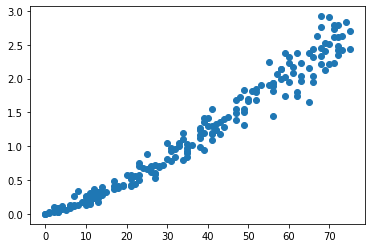

In [0]:
import matplotlib.pyplot as plt
plt.scatter(df.clip_count,df.val/200)

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive
